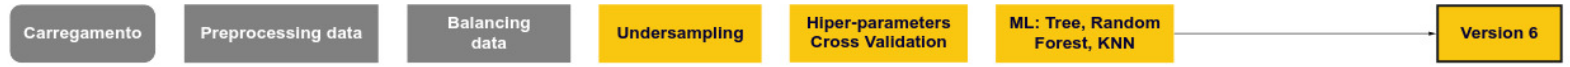

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, recall_score
from yellowbrick.classifier  import ConfusionMatrix

In [2]:
with open("data_balanced_under.pkl", 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

<IPython.core.display.Javascript object>

In [3]:
x_train.shape, y_train.shape

((10008, 23), (10008,))

In [4]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

# MACHINE LEARNING

In [5]:
version6_accuracy = [] # version6 = [tree, random_forest, knn] for accuracy
version6_recall = [] # version6 = [tree, random_forest, knn] for recall

# Decision Tree

In [6]:
parametros = {'criterion':['gini', 'entropy'], 'splitter': ['best', 'random'],
              'max_depth':[2, 4, 6, 8, 10, 12, 15], 'min_samples_split':[2, 4, 6, 8],
              'min_samples_leaf':[1, 3, 5, 7, 9]}

In [7]:
grid = RandomizedSearchCV(estimator= DecisionTreeClassifier(), param_distributions= parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.6926448364229474
{'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 6, 'criterion': 'gini'}


In [8]:
parametros_tree = grid_result.best_params_

tree = DecisionTreeClassifier(**parametros_tree)
tree.fit(x_train, y_train)
v6_tree = tree.predict(x_test)

In [9]:
version6_accuracy.append( accuracy_score(y_test, v6_tree) )
version6_recall.append( recall_score(y_test, v6_tree, pos_label='1') )

In [10]:
version6_accuracy

[0.7802666666666667]

In [11]:
version6_recall

[0.5600490196078431]

In [12]:
cf_tree = confusion_matrix(y_test, v6_tree)

In [13]:
print(classification_report(y_test, v6_tree))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5868
           1       0.50      0.56      0.53      1632

    accuracy                           0.78      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.78      0.78      7500



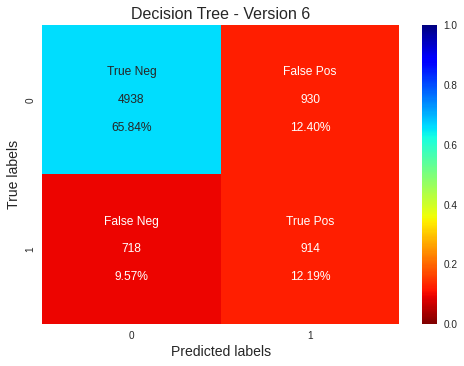

In [14]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_tree.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_tree.flatten()/np.sum(cf_tree)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_tree/np.sum(cf_tree), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Decision Tree - Version 6", fontsize = 16)

plt.show()

# Random Forest

In [15]:
parametros = {'n_estimators':[75, 100, 125, 150], 'criterion': ['gini', 'entropy'],
              'max_depth':[2, 4, 6, 8, 10, 15], 'min_samples_split':[2, 4, 6, 8, 10],
             'min_samples_leaf': [1, 3, 5, 7, 9]}

In [16]:
grid = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.7101319470135061
{'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'entropy'}


In [17]:
parametros_rf = grid_result.best_params_

rf = RandomForestClassifier(**parametros_rf)
rf.fit(x_train, y_train)

v6_rf = rf.predict(x_test)

In [18]:
version6_accuracy.append(accuracy_score(y_test, v6_rf))
version6_recall.append(recall_score(y_test, v6_rf, pos_label='1'))

In [19]:
print(classification_report(y_test, v6_rf))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      5868
           1       0.47      0.61      0.53      1632

    accuracy                           0.76      7500
   macro avg       0.68      0.71      0.69      7500
weighted avg       0.79      0.76      0.78      7500



In [20]:
cf_rf = confusion_matrix(y_test, v6_rf)

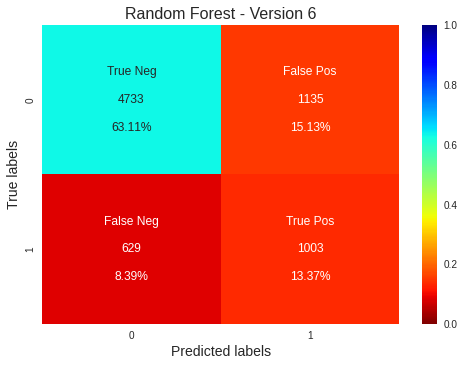

In [21]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_rf.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_rf/np.sum(cf_rf), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Random Forest - Version 6", fontsize = 16)

plt.show()

# KNN

In [22]:
parametros = {'n_neighbors':[2,5,7,10,13, 15, 16, 17, 19,20, 21,22,23], 'weights':['uniform', 'distance'],
             'algorithm':['ball_tree', 'kd_tree', 'brute', 'auto']}

In [23]:
grid = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.6072147243061787
{'weights': 'distance', 'n_neighbors': 21, 'algorithm': 'kd_tree'}


In [24]:
parametros_knn = grid_result.best_params_
knn = KNeighborsClassifier(**parametros_knn)
knn.fit(x_train, y_train)
v6_knn = knn.predict(x_test)

In [25]:
version6_accuracy.append(accuracy_score(y_test, v6_knn))
version6_recall.append(recall_score(y_test, v6_knn, pos_label = '1'))

In [26]:
print(classification_report(y_test, v6_knn))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67      5868
           1       0.29      0.65      0.40      1632

    accuracy                           0.58      7500
   macro avg       0.57      0.60      0.54      7500
weighted avg       0.73      0.58      0.61      7500



In [27]:
cf_knn = confusion_matrix(y_test, v6_knn)

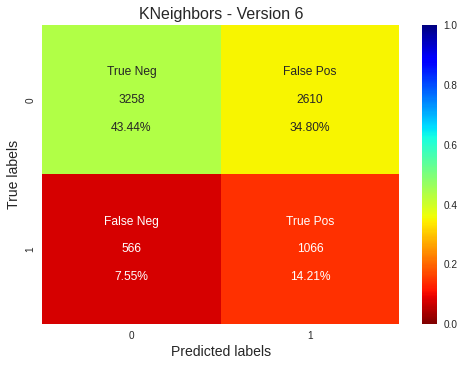

In [28]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_knn.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_knn.flatten()/np.sum(cf_knn)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_knn/np.sum(cf_knn), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("KNeighbors - Version 6", fontsize = 16)

plt.show()

# Cross Validation

In [29]:
from functools import partial
from sklearn.metrics import precision_score, make_scorer

custom_scorer = make_scorer(recall_score, pos_label="1")


#import warnings
#warnings.filterwarnings('ignore')

resultados_tree_accuracy = []
resultados_random_accuracy = []
resultados_knn_accuracy = []

resultados_tree_recall = []
resultados_random_recall = []
resultados_knn_recall = []



for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    tree = DecisionTreeClassifier(**parametros_tree)
    
    scores = cross_val_score(tree, x_train, y_train, scoring=custom_scorer, cv = kfold)
    resultados_tree_recall.append(scores.mean())
    
    scores = cross_val_score(tree, x_train, y_train, scoring='accuracy', cv = kfold)
    resultados_tree_accuracy.append(scores.mean())
    
    print('Tree - Stage: {}'.format(i))
    
    # ==================================================================
        
    rf = RandomForestClassifier(**parametros_rf)
    
    scores = cross_val_score(rf, x_train, y_train,scoring = custom_scorer, cv=kfold)
    resultados_random_recall.append(scores.mean())
    
    scores = cross_val_score(rf, x_train, y_train,scoring = 'accuracy', cv=kfold)
    resultados_random_accuracy.append(scores.mean())
    
    print('Random Forest - Stage: {}'.format(i))
    
    #===================================================================
    
    knn = KNeighborsClassifier(**parametros_knn)
    
    scores = cross_val_score(knn, x_train, y_train, scoring=custom_scorer, cv=kfold)
    resultados_knn_recall.append(scores.mean())
    
    scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=kfold)
    resultados_knn_accuracy.append(scores.mean())
    
    
    #===================================================================
    print('KNN - Stage: {}'.format(i))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 29


In [30]:
resultados_accuracy = pd.DataFrame({'Decision Tree': resultados_tree_accuracy, 
                           'Random Forest': resultados_random_accuracy,
                          'KNN': resultados_knn_accuracy})

resultados_recall = pd.DataFrame({'Decision Tree': resultados_tree_recall, 
                           'Random Forest': resultados_random_recall,
                          'KNN': resultados_knn_recall})

In [31]:
resultados_accuracy.to_csv("resultados_accuracy_version6.csv")
resultados_recall.to_csv("resultados_recall_version6.csv")

In [32]:
resultados_accuracy.head()

,Decision Tree,Random Forest,KNN
0,0.695743,0.709433,0.608116
1,0.696544,0.710831,0.607613
2,0.692447,0.710433,0.604216
3,0.699138,0.711529,0.608211
4,0.695945,0.708634,0.606114


In [33]:
resultados_recall.head()

,Decision Tree,Random Forest,KNN
0,0.557556,0.619859,0.658274
1,0.576201,0.620180,0.657012
2,0.562627,0.622580,0.651120
3,0.561703,0.622183,0.659187
4,0.567489,0.622080,0.660367


# Saving and Storaging the results

In [34]:
accuracy_list = []
recall_list = []

for i in range(len(resultados_accuracy.columns)):
    accuracy_list.append( resultados_accuracy[ resultados_accuracy.columns[i] ].mean() )
    recall_list.append( resultados_recall[ resultados_recall.columns[i] ].mean() )

In [35]:
resultados_accuracy.mean()

Decision Tree    0.695034
Random Forest    0.710658
KNN              0.606901
dtype: float64

In [36]:
accuracy_list

[0.6950340526140527, 0.7106580253080252, 0.6069008458208457]

In [37]:
accuracy = pd.read_csv('accuracy_versions.csv')
recall = pd.read_csv("recall_versions.csv")

accuracy

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5
0,Decision Tree,0.733600,0.818782,0.721333,0.627600,0.840805
1,Random Forest,0.819067,0.817401,0.814667,0.750667,0.872534
2,KNN,0.762133,0.770861,0.607467,0.578533,0.826992


In [38]:
recall

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5
0,Decision Tree,0.409314,0.358220,0.411152,0.611520,NaN
1,Random Forest,0.368260,0.359337,0.395833,0.619485,NaN
2,KNN,0.194240,0.097050,0.530025,0.590686,NaN


In [39]:
accuracy['Version 6'] = accuracy_list
recall['Version 6'] = recall_list

In [40]:
recall

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6
0,Decision Tree,0.409314,0.358220,0.411152,0.611520,NaN,0.561127
1,Random Forest,0.368260,0.359337,0.395833,0.619485,NaN,0.621627
2,KNN,0.194240,0.097050,0.530025,0.590686,NaN,0.658990


In [41]:
accuracy

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6
0,Decision Tree,0.733600,0.818782,0.721333,0.627600,0.840805,0.695034
1,Random Forest,0.819067,0.817401,0.814667,0.750667,0.872534,0.710658
2,KNN,0.762133,0.770861,0.607467,0.578533,0.826992,0.606901


In [42]:
accuracy.to_csv("accuracy_versions.csv", index=None)

recall.to_csv("recall_versions.csv", index = None)